
# <p style="text-align: center;"> MODELADO DE OBJETOS AUTOGRAVITANTES</p>

### <p style="text-align: center;">Camilo Parra, William Romero</p>

#### <p style="text-align: center;">Junio de 2023</p>

## Pregunta de Investigación

La intención de este trabajo es entender , o al menos intuir ¿Cual es la incidencia de los fluidos no pascalianos en la estructura estelar newtoniana y relativistas?. Esto es, supondremos un perfil de densidad y una forma particular de la distribución de presiones radiales y tangenciales. A partir de esas suposiciones compararemos los perfiles de presión para un espacio de parámetros.

### 1. Modelando objetos autogravitantes

#### 1.1. El concepto

$$\frac{\delta P(r)}{\delta r}$$

In [52]:
from scipy.integrate import odeint, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

### Newtonian Model - Strategy 1

In [79]:
# constants
u = 1
k = 5
n = 6
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * (h * u * m) / (G * k * pow(r, 2))
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0]

# declare a time vector (time window)
r = np.linspace(0.001,2,10000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G, 1*G, 3*G, 5*G]
g_values = [-5, -3, -1, 0, 1, 3, 5]
pressure_values = []
mass_values = []
density_values = []

for h in h_values:
    x = solve_ivp(odes, t_eval = r , y0 = x0, t_span=[0.001, 2])
    density_values.append(1 - B * pow(r, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])


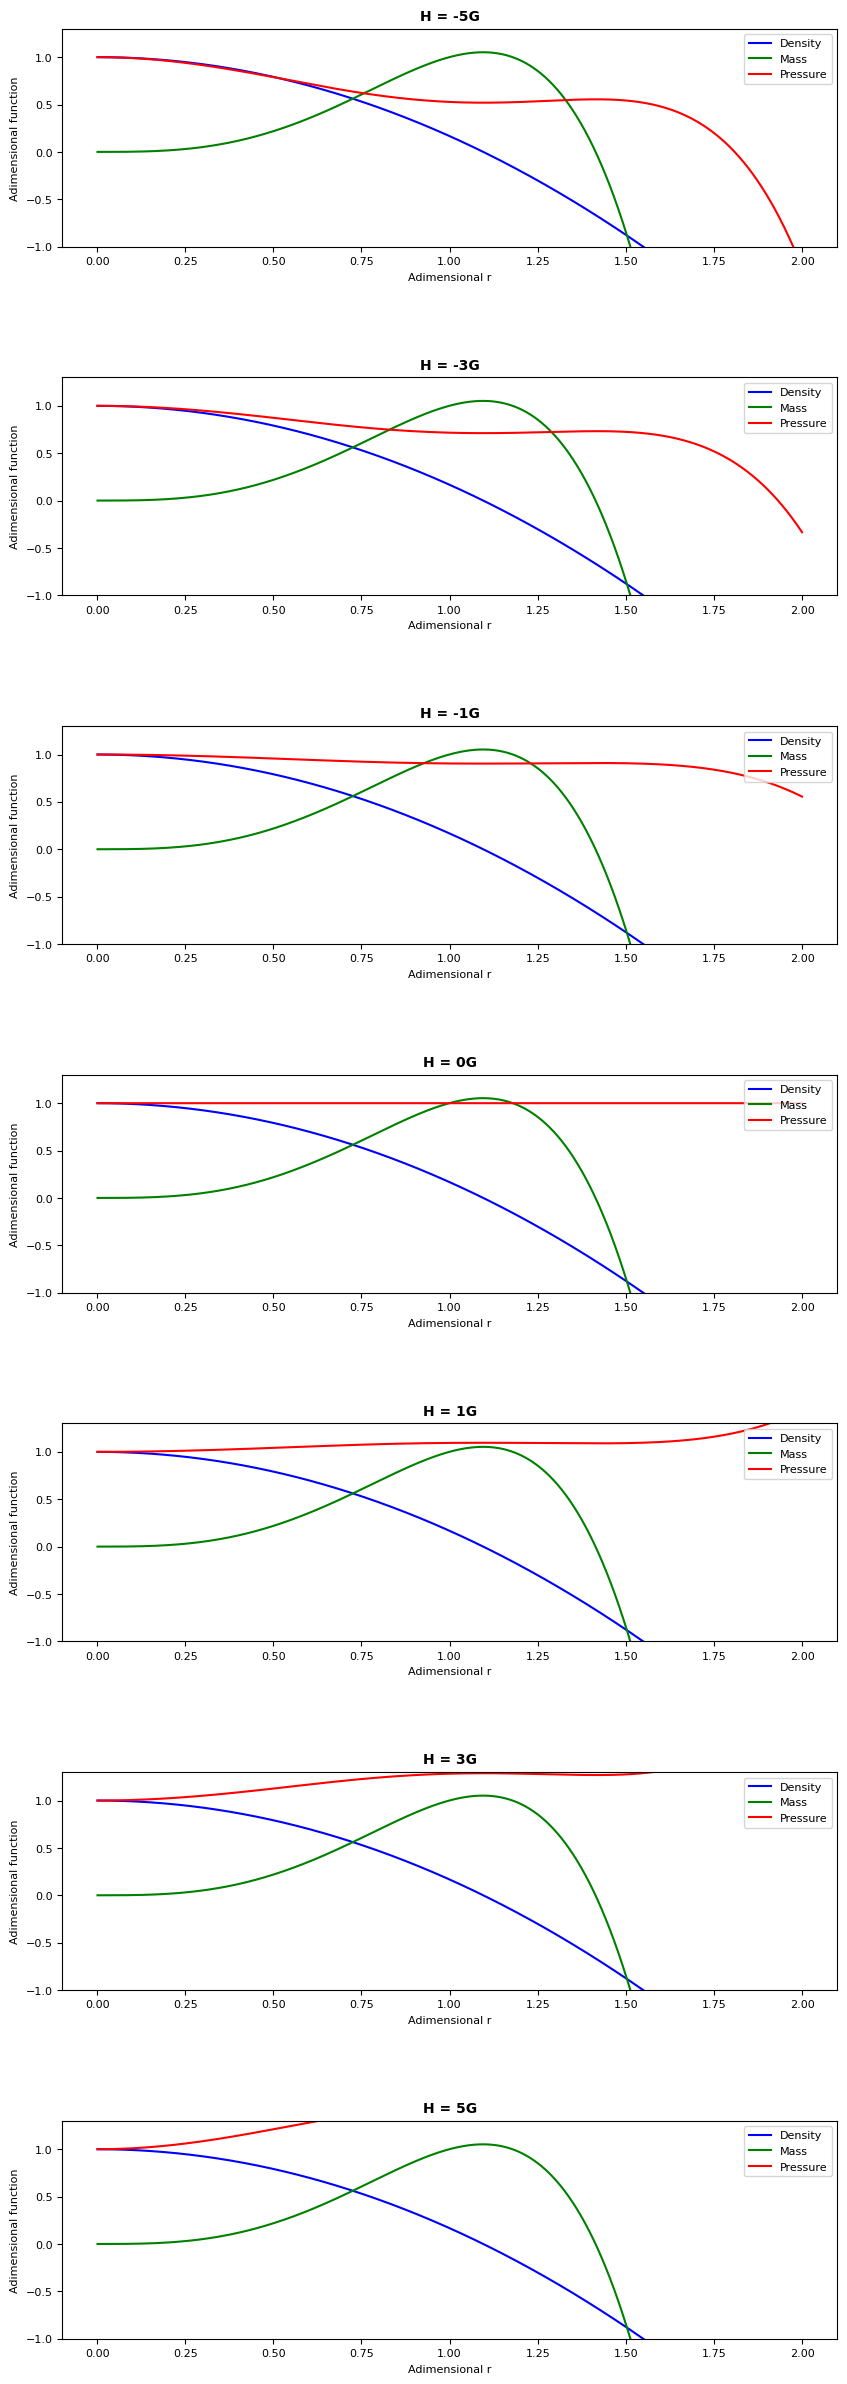

In [80]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 30), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r, density_values[i], label='Density', color='blue')
    axs[i].plot(r, mass_values[i], label='Mass', color='green')
    axs[i].plot(r, pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-1, 1.3)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)



### Relativistic Model - Strategy 1

In [104]:
# constants
u = 1
k = 5
n = 10
B = 5/3 * (1 - 3/n) 
G = 6.67430e-11 # meters cubed per kilogram second squared

def odes(r, x):
    # assign each ODE to a vector element
    P = x[0]
    m = x[1]

    # define each ODE
    dPdr = (1 - B * pow(r, 2)) * (h * u * m) / (G * k * pow(r, 2)) * (1 + (k * P)/(1 - B * pow(r, 2))) * (1 + 3 * n * k * P * pow(r, 3) / m) / (1 - 2 * u * m / r)
    dmdr = (1 - B * pow(r, 2)) * n * pow(r, 2)

    return [dPdr, dmdr]

# initial conditions
x0 = [1, 0.1]

# declare a time vector (time window)
r = np.linspace(0.001, 2, 1000)

# It only makes sense to represent h as multiples of G because it holds the same degree of magnitud according to G units
h_values = [-5*G, -3*G, -1*G, 0*G, 1*G, 3*G, 5*G]
g_values = [-5, -3, -1, 0, 1, 3, 5]
pressure_values = []
mass_values = []
density_values = []
r_values = []


for h in h_values:
    x = solve_ivp(odes, y0 = x0, t_span=[0.001, 2], method='Radau')
    r_values.append(x.t)
    density_values.append(1 - B * pow(x.t, 2))
    pressure_values.append(x.y[0])
    mass_values.append(x.y[1])
    

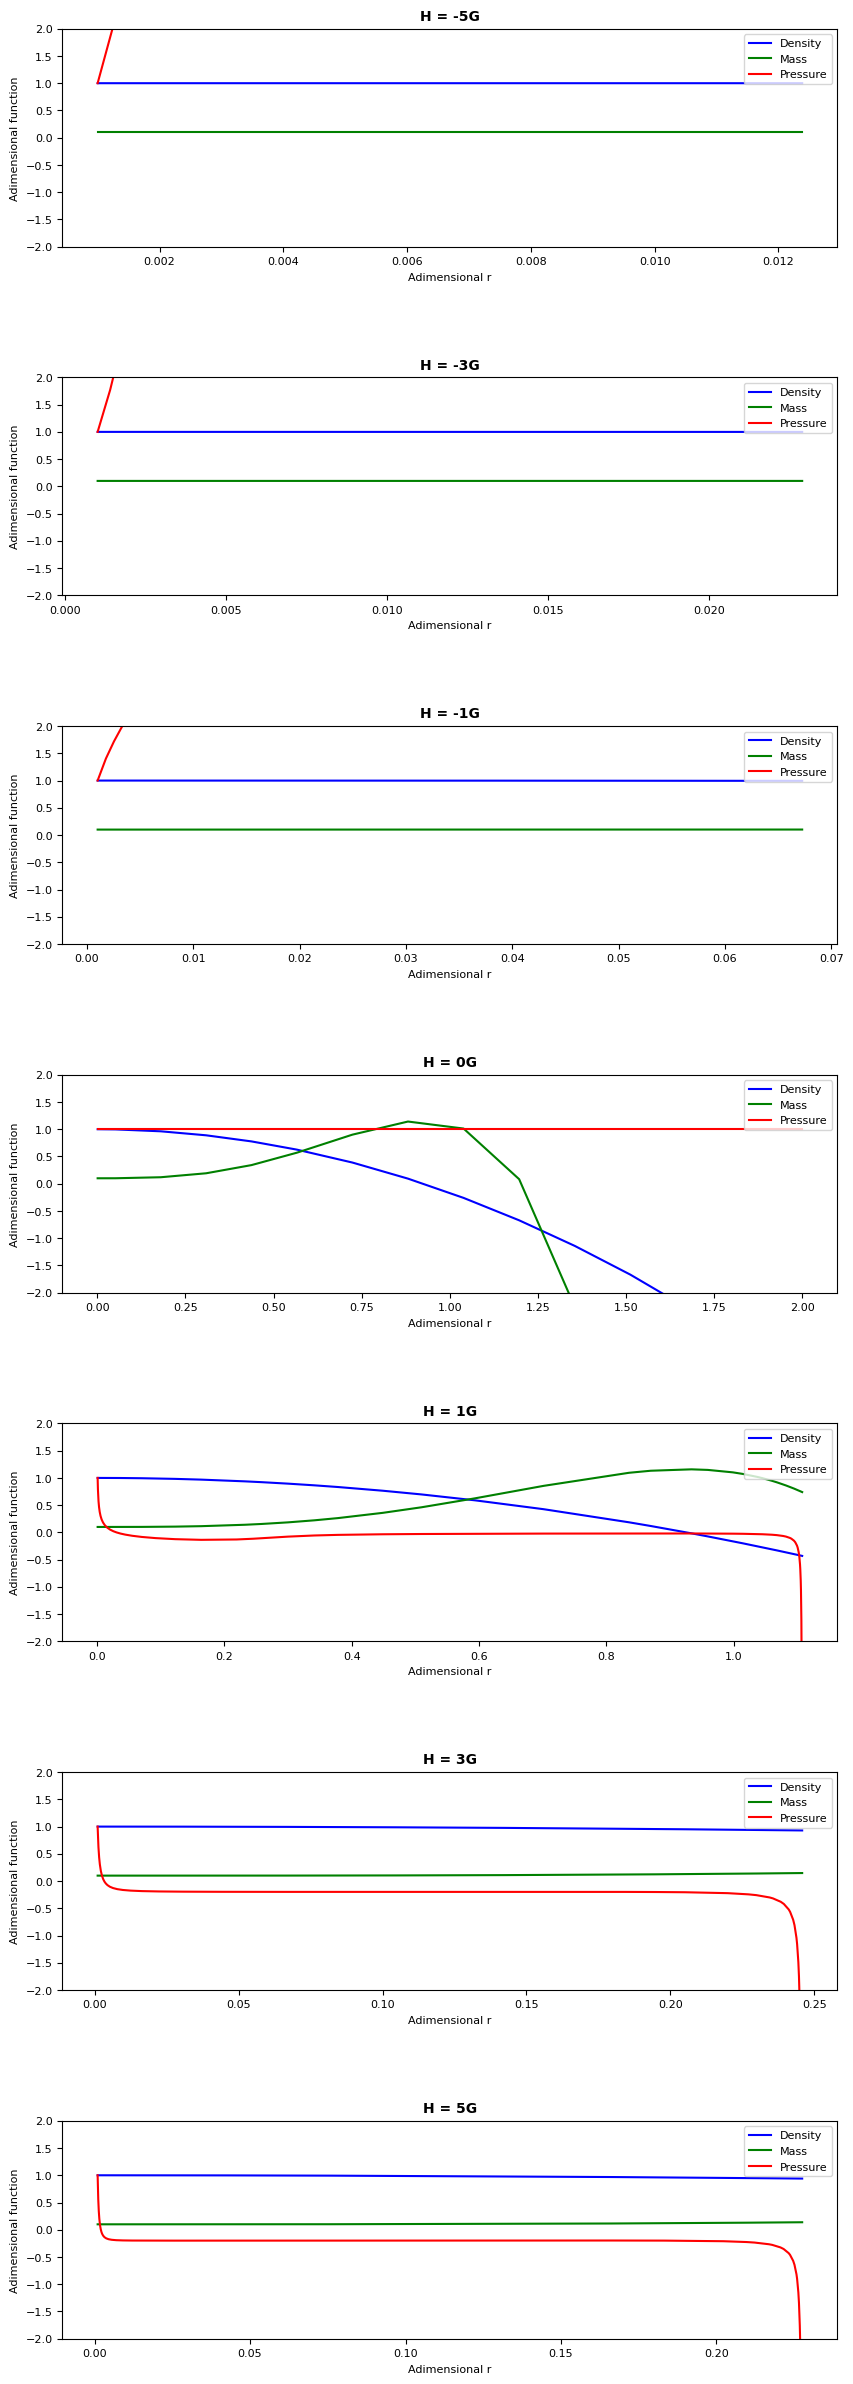

In [105]:
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(10, 30), gridspec_kw={'hspace': 0.6})

for i, g_value in enumerate(g_values):
    axs[i].plot(r_values[i], density_values[i], label='Density', color='blue')
    axs[i].plot(r_values[i], mass_values[i], label='Mass', color='green')
    axs[i].plot(r_values[i], pressure_values[i], label='Pressure', color='red')
    axs[i].set_title(f'H = {g_value}G', fontsize=10, fontweight='bold')
    axs[i].set_xlabel('Adimensional r', fontsize=8)
    axs[i].set_ylabel('Adimensional function', fontsize=8)
    axs[i].set_ylim(-2, 2)

    # Set the font size of the tick labels on the x and y axes
    axs[i].tick_params(axis='both', labelsize=8)

    # Add a legend to the plot
    axs[i].legend(loc='upper right', fontsize=8)